In [1]:
from roadvision3d.src.datasets.RCooper_DAIR import RCooper_DAIR
import yaml

from roadvision3d.src.datasets.kitti_utils import Object3d
import numpy as np

import matplotlib.pyplot as plt
from visualizer import draw_2d_bboxes, draw_3d_bboxes


%load_ext autoreload
%autoreload 2

In [7]:
cfg_path = '/home/javier/pytorch/RoadVision3D/roadvision3d/configs/MonoLSS_RCooperDAIR_150e.yaml'
cfg = yaml.load(open(cfg_path, 'r'), Loader=yaml.Loader)

# train_loader, val_loader, test_loader = build_dataloader(cfg['dataset'])
# dataset = KITTI(split='trainval', cfg=cfg['dataset'])
RCooper_dataset = RCooper_DAIR(split='trainval', cfg=cfg['dataset'])

Resolution init: [1920 1088]


In [8]:
print(RCooper_dataset.data_dir)
print(RCooper_dataset.image_dir)
print(RCooper_dataset.label_dir)
print(RCooper_dataset.calib_dir)

/home/javier/datasets/DAIR-RCooper/RCooper-DAIR
/home/javier/datasets/DAIR-RCooper/RCooper-DAIR
/home/javier/datasets/DAIR-RCooper/RCooper-DAIR
/home/javier/datasets/DAIR-RCooper/RCooper-DAIR


In [9]:
id_num = 0

id = RCooper_dataset.idx_list[id_num]
print("Item:", id)

Item: corridor/infrastructure-side/image/000000


Item: corridor/infrastructure-side/image/000378


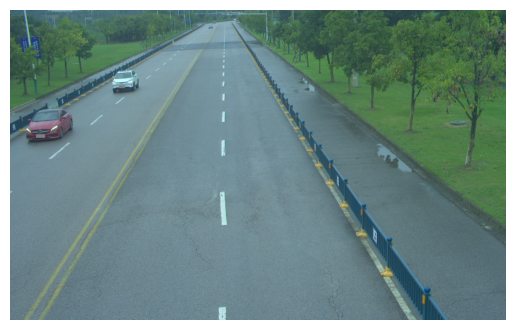

In [14]:
id_num = 345

id = RCooper_dataset.idx_list[id_num]
print("Item:", id)

img = RCooper_dataset.get_image(id)

# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')  # Hide axis for better visualization
plt.show()

In [19]:
calib = RCooper_dataset.get_calib(id)
print(calib.P2)
print(calib.R0)
print(calib.V2C)
print(calib.C2V)


/home/javier/datasets/DAIR-RCooper/RCooper-DAIR/corridor/infrastructure-side/calib/camera_intrinsic/000378.json
/home/javier/datasets/DAIR-RCooper/RCooper-DAIR/corridor/infrastructure-side/calib/virtuallidar_to_camera/000378.json
[[2.7154080e+03 0.0000000e+00 9.5227264e+02 0.0000000e+00]
 [0.0000000e+00 2.7089412e+03 6.0149805e+02 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[ 0.0444578  0.995555  -0.0830331 -0.375    ]
 [ 0.171304  -0.0894812 -0.981146   0.       ]
 [-0.984215   0.0293958 -0.174521  -0.5625   ]]
[[ 0.0444578   0.171304   -0.984215   -0.5369493 ]
 [ 0.995555   -0.0894812   0.0293958   0.38986826]
 [-0.0830331  -0.981146   -0.174521   -0.12930547]]


In [22]:
labels = RCooper_dataset.get_label(id)

print(labels)

/home/javier/datasets/DAIR-RCooper/RCooper-DAIR/corridor/infrastructure-side/calib/camera_intrinsic/000378.json
/home/javier/datasets/DAIR-RCooper/RCooper-DAIR/corridor/infrastructure-side/calib/virtuallidar_to_camera/000378.json
[car 0.000 0.000 1.750 box2d: [0. 0. 0. 0.] hwl: [1.469 1.973 4.563] pos: [-11.704497   -1.9514339  39.639133 ] ry: 1.463, car 0.000 0.000 1.699 box2d: [0. 0. 0. 0.] hwl: [1.632 2.058 4.550] pos: [-11.557874   -6.5750804  61.60433  ] ry: 1.514]


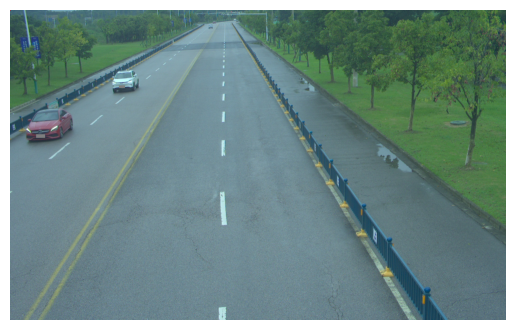

<PIL.Image.Image image mode=RGB size=1920x1200 at 0x7F09580449D0>


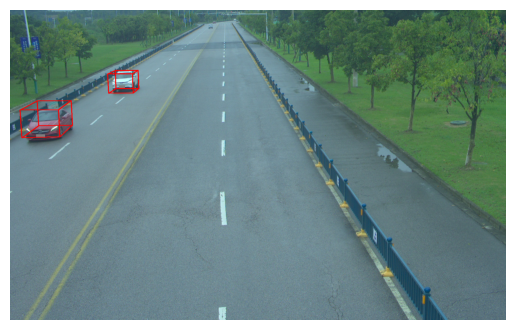

In [23]:
img_2d = img.copy()
draw_2d_bboxes(img_2d, labels)

img_3d = img.copy()
print(img_3d)
draw_3d_bboxes(img_3d, labels, calib, 0.20)